In [77]:
import os
from pathlib import Path
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [89]:
def build_dataset(sound_path='/kaggle/input/tamil-digits/Tamil-Digits', window_size=512):
    # Define the path to the sound files
    path = Path(sound_path)
    print("yes")
    # Retrieve the list of files in the directory
    files = sorted([file for file in path.iterdir() if file.is_file()])
    
    # Initialize lists to store training and testing data
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    
    # Initialize a dictionary to store data for each digit
    data = dict()
    
    # Get the total number of files
    n = len(files)
    print(n)
    # Iterate over each file
    for i in range(n):
        print(str(files[i]))
        # Extract features from the current file
        feature = feature_extractor(sound_path=str(files[i]), window_size=window_size)[3]
        
        # Extract the digit label from the filename
        digit = files[i].name[0]
        
        # Check if the digit is already in the data dictionary
        if digit not in data.keys():
            # If not, create a new list for that digit
            data[digit] = []
            # Append the feature to the test set
            x_test.append(feature)
            # Append the digit label to the test labels
            y_test.append(digit)
        else:
            # If the digit is already in the dictionary
            if np.random.rand() < 0.1:
                # Randomly assign 10% of the samples to the test set
                x_test.append(feature)
                y_test.append(digit)
            else:
                # Assign the rest of the samples to the training set
                x_train.append(feature)
                y_train.append(digit)
            
            # Append the feature to the data dictionary
            data[digit].append(feature)
    
    # Return the training and testing data along with the data dictionary
    return x_train, y_train, x_test, y_test, data


In [90]:
def feature_extractor(sound_path, window_size):
    # Load the audio file
    signal, sr = librosa.load(sound_path)
    
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13,sr = sr, hop_length=window_size)
    
    # Extract first MFCCs derivatives
    delta_mfccs = librosa.feature.delta(mfccs)
    
    # Extract second MFCCs derivatives
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    
    # Concatenate features
    mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
    
    # Return all features
    return mfccs, delta_mfccs, delta2_mfccs, mfccs_features


In [91]:
#Experiment Here 

audio_file = "/kaggle/input/tamil-digits/Tamil-Digits/0_v1.wav"
# !!!
# Call the feature_extractor function with window size (default is 512 generated 68 frames for the given audio file)
# Changing to 256 gives 135 frames
a, b, c, d = feature_extractor(audio_file,256)
d.shape

In [92]:
def MelSpectrogram(mfccs, delta_mfccs, delta2_mfccs, mfccs_features):
    print("MFCCs shape:", mfccs.shape)
    print("Delta MFCCs shape:", delta_mfccs.shape)
    print("Delta2 MFCCs shape:", delta2_mfccs.shape)
    print("Concatenated MFCCs features shape:", mfccs_features.shape)
    
    # Plot MFCCs
    plt.figure(figsize=(25, 10))
    plt.subplot(3, 1, 1)
    librosa.display.specshow(mfccs, x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCCs')
    
    # Plot delta MFCCs
    plt.subplot(3, 1, 2)
    librosa.display.specshow(delta_mfccs, x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Delta MFCCs')
    
    # Plot delta2 MFCCs
    plt.subplot(3, 1, 3)
    librosa.display.specshow(delta2_mfccs, x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Delta2 MFCCs')
    
    plt.tight_layout()
    plt.show()


MFCCs shape: (13, 68)
Delta MFCCs shape: (13, 68)
Delta2 MFCCs shape: (13, 68)
Concatenated MFCCs features shape: (39, 68)


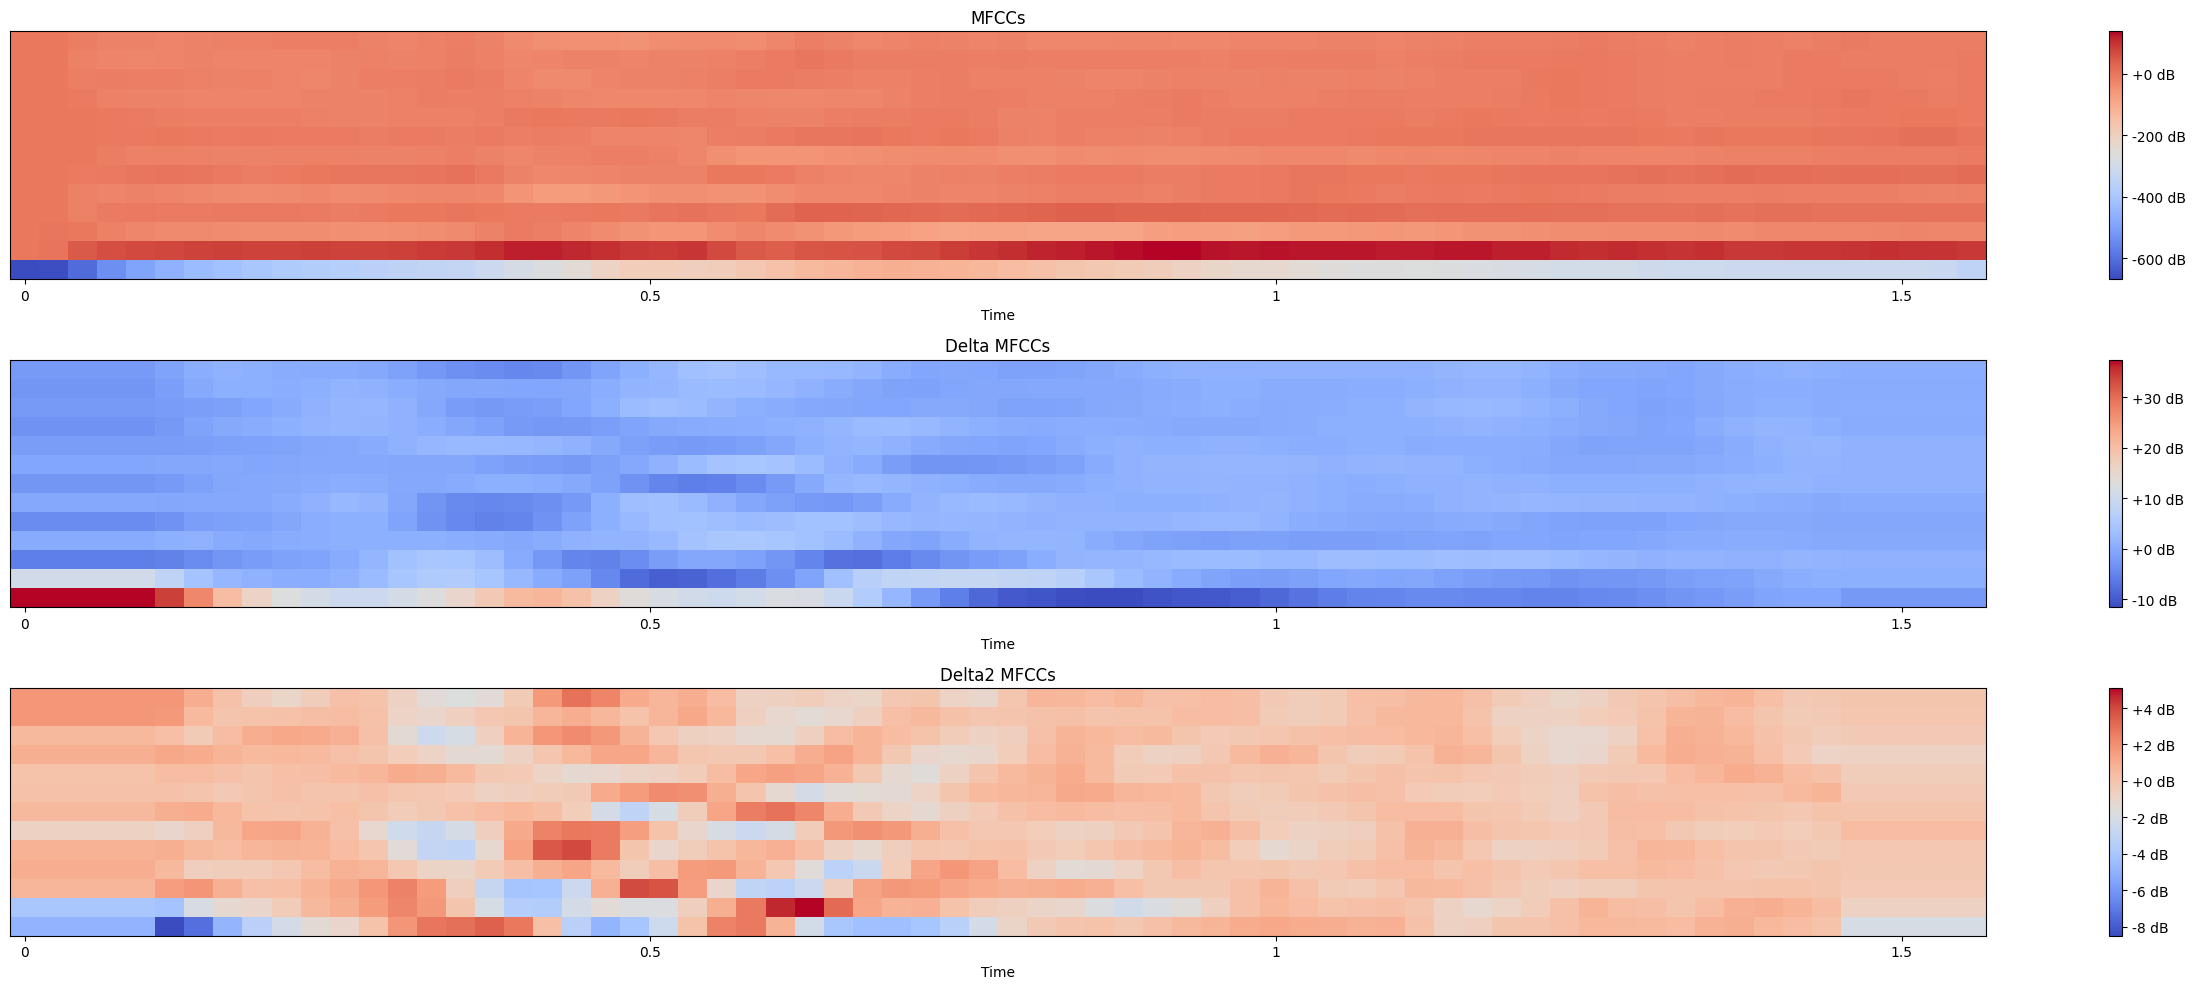

In [93]:
# Assuming you have the sampling rate stored in a variable named `sr`
MelSpectrogram(a, b, c, d)

In [94]:
#!!! Main change to be done here
#Change Window size here
x_train, y_train, x_test, y_test, data = build_dataset(window_size=256)